### Github URL: https://github.com/JuhiRamzai/AdvancedLinearRegression
It was requested in the platform to upload the git URL, kindly refer the git link

# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

# The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

3. the optimal value of lambda for ridge and lasso regression.

# Business Goal

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## The steps followed in this notebook are summarized as follows:
1. Reading, understanding and visualizing the data
2. Outlier and missing value treatment
3. Preparing the data for modeling (train-test split, rescaling etc.)
4. Training the model
5. Predictions and evaluation on test data set
6. Interpretation of the results

## 1. Reading, understanding and visualizing the data

In [90]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [91]:
data = pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [92]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [94]:
#We will be using a subset of the data by taking Sale Condition as Normal only because other conditions might 
#not denote the right price

data1 = data[data['SaleCondition']=='Normal']
data1.shape

(1198, 81)

In [95]:
#There are three columns which are actually categorical but are encoded in numerical formats, 
#changing the data type to object

data1['MSSubClass'] = data1['MSSubClass'].astype('object')
data1['OverallQual'] = data1['OverallQual'].astype('object')
data1['OverallCond'] = data1['OverallCond'].astype('object')

In [96]:
# Separating the Numerical and Categorical features for analysis
numeric = data1.select_dtypes(include=['int64', 'float64'])
categorical = data1.select_dtypes(include=['object'])

## Univariate Analysis

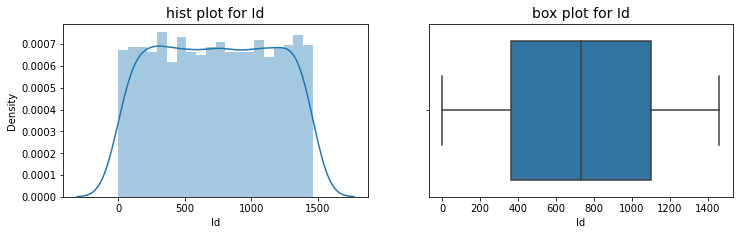

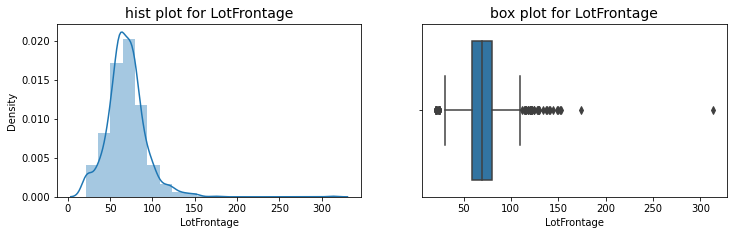

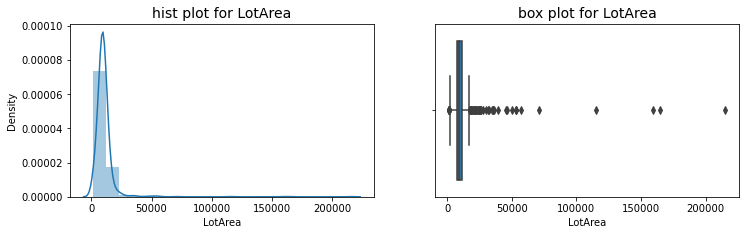

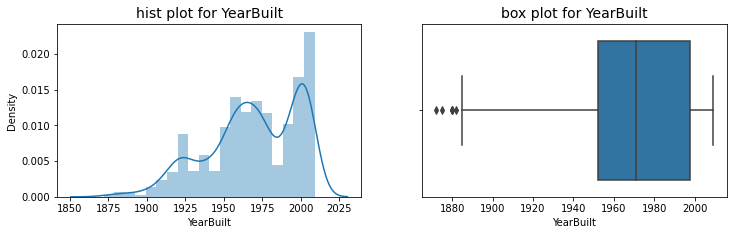

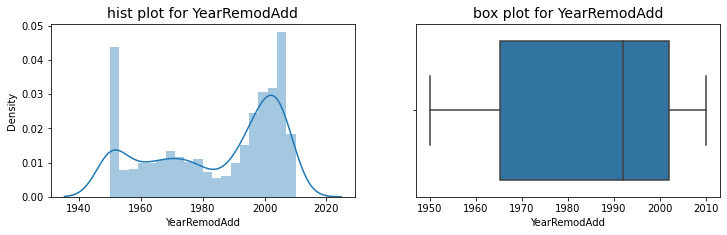

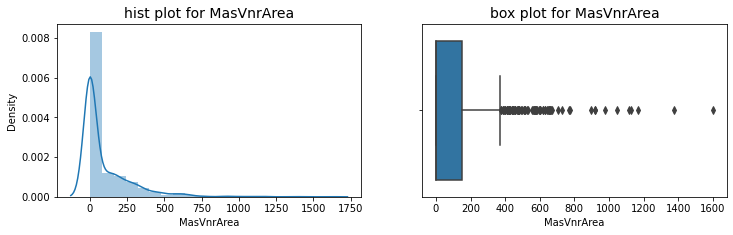

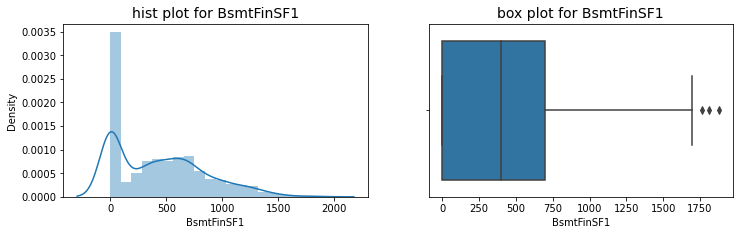

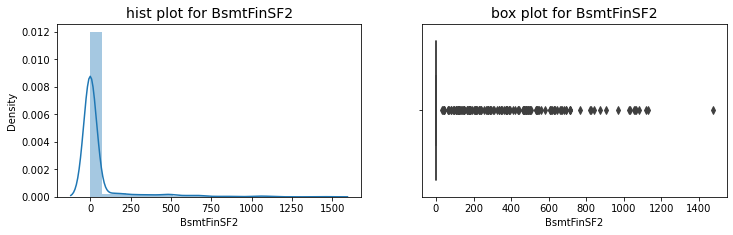

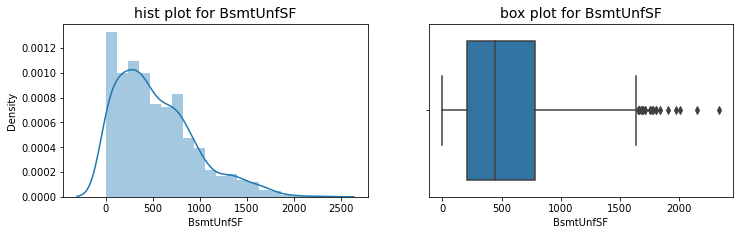

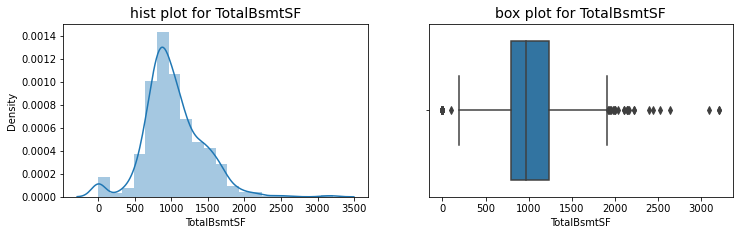

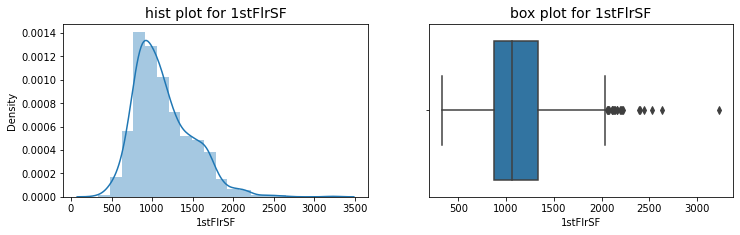

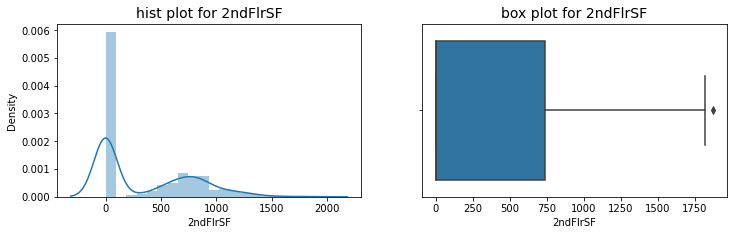

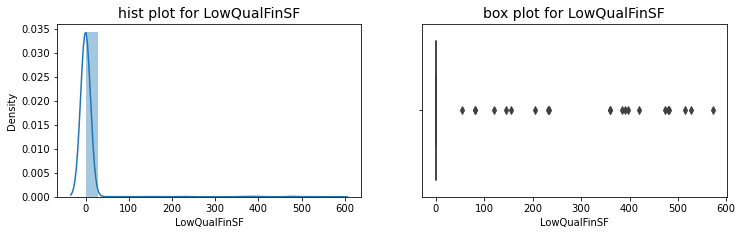

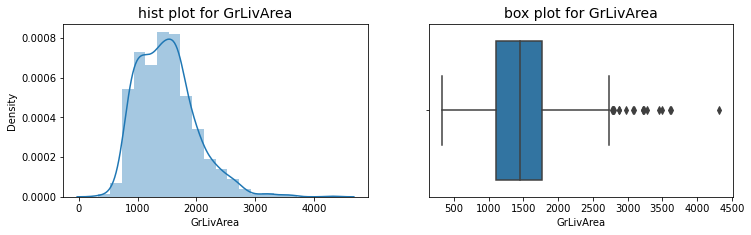

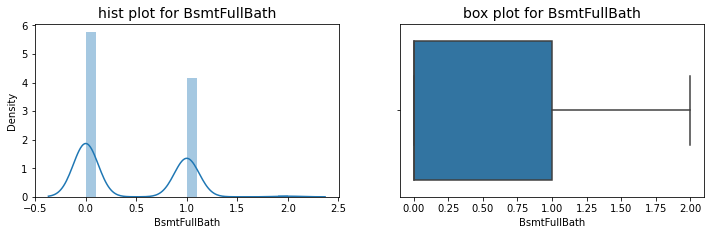

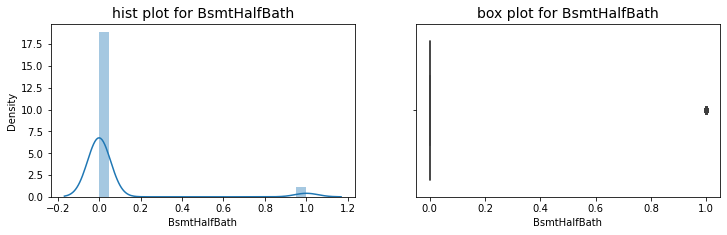

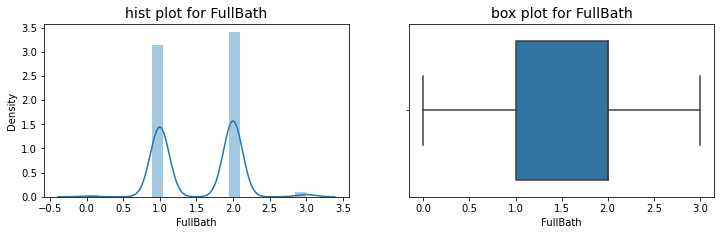

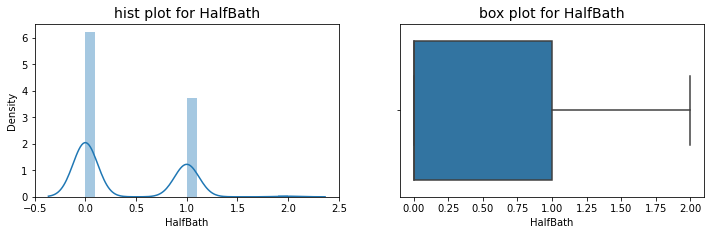

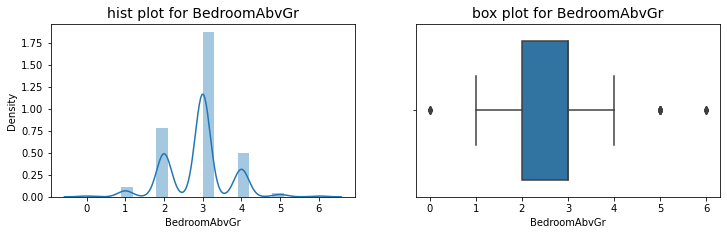

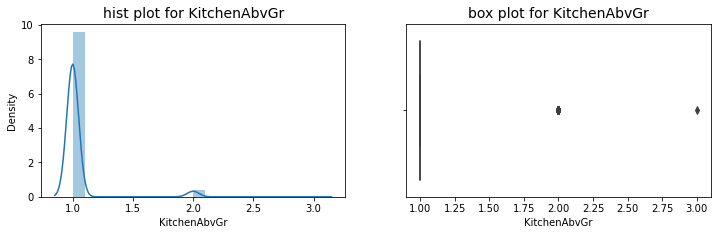

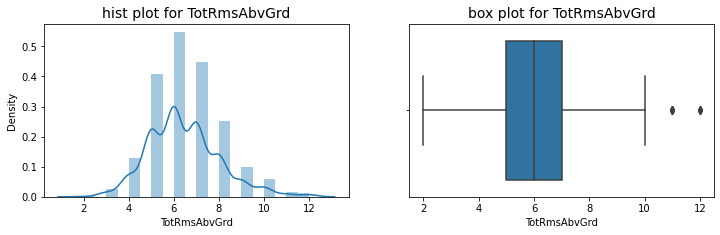

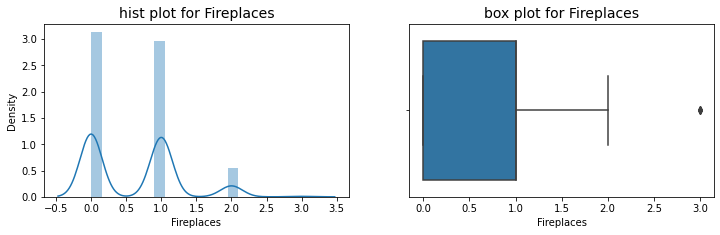

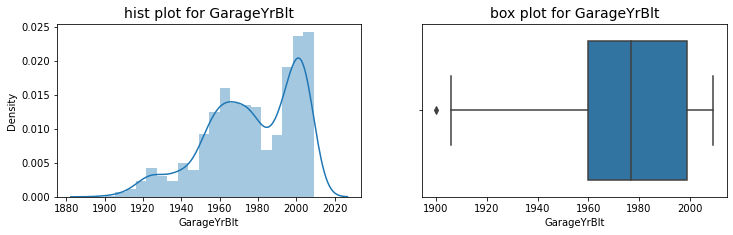

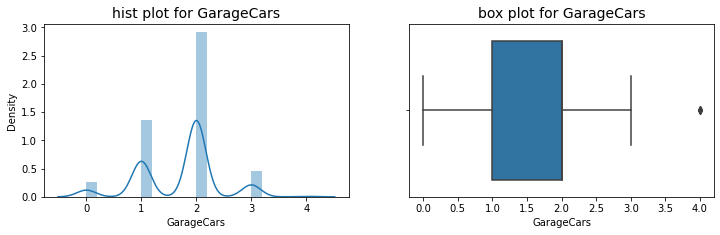

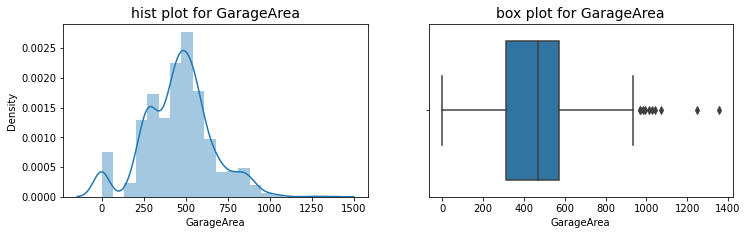

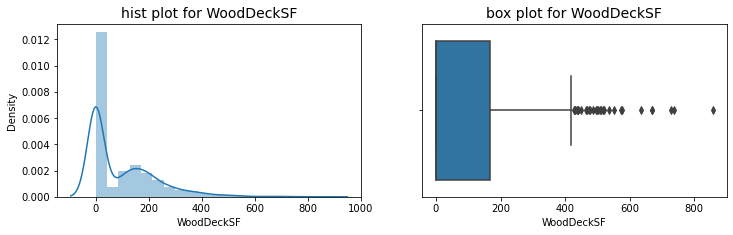

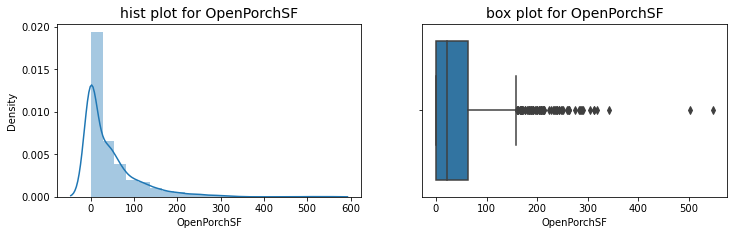

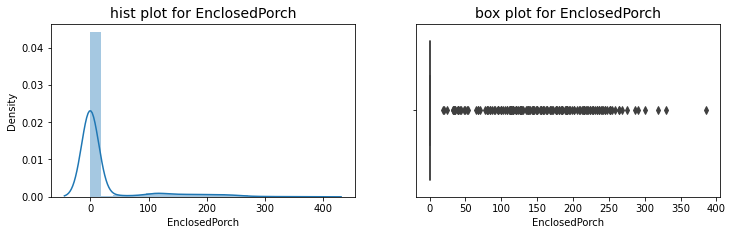

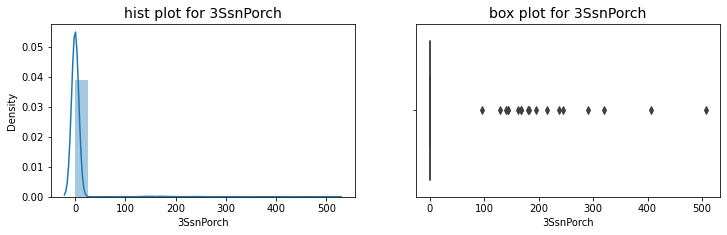

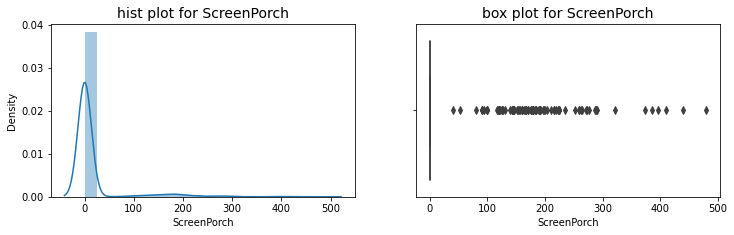

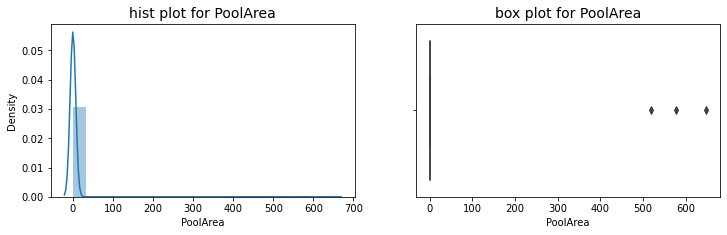

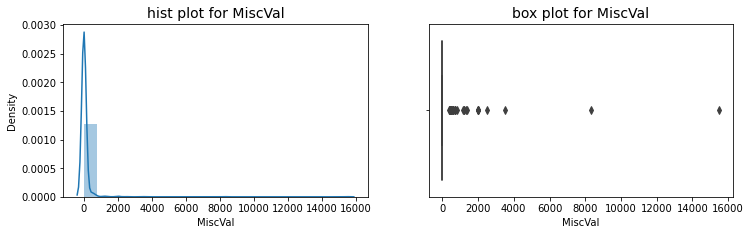

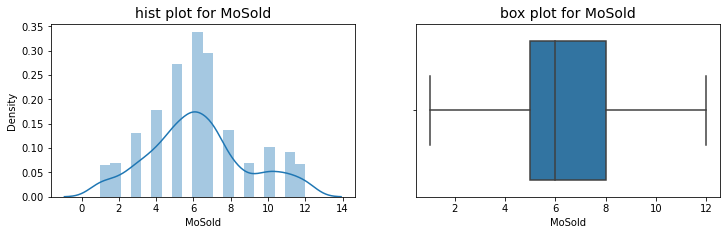

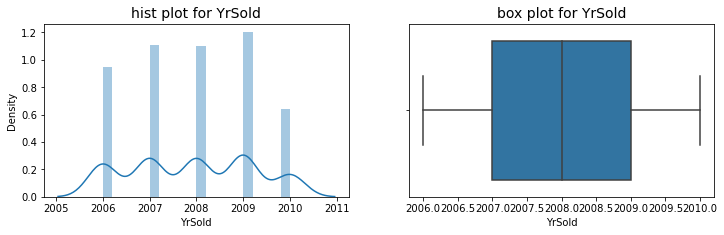

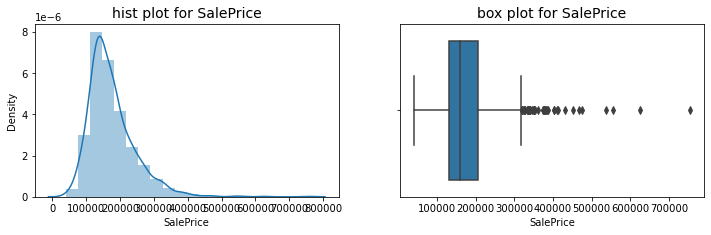

In [97]:
# Creating a function to plot histogram and a box plot of all the variables in the data to check how data is distributed
def plot_univariate(i):
    plt.figure(figsize=(12,7))
    plt.subplot(2, 2, 1)
    ax = sns.distplot(data1[i],kde=True,bins=20)
    plt.title("hist plot for " +str(i),fontsize=14)
    # subplot 2
    plt.subplot(2, 2, 2)
    ax = sns.boxplot(data1[i])
    plt.title("box plot for " +str(i),fontsize=14)
    plt.show()
# plotting plot_uni() for all the numeric variables in the data     
for i in numeric:
    plot_univariate(i) 

### There are many variables which have very evident outliers. Outlier treatment has to be done.

In [98]:
# Let's print the outliers percentage in the variables
# Considering median+1.5IQR > outliers < median-1.5IQR 

outliers_percentage={}

for ft in numeric.columns:
    IQR=numeric[ft].quantile(.75)-numeric[ft].quantile(.25)
    outliers_count=numeric[(numeric[ft]>(numeric[ft].quantile(.75)+1.5*IQR)) | (numeric[ft]<(numeric[ft].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[ft]=round(outliers_count/numeric.shape[0]*100,2)
    
outlier=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier.sort_values(by="Percentage", ascending=False)

,Features,Percentage
27,EnclosedPorch,14.86
7,BsmtFinSF2,12.35
29,ScreenPorch,8.01
5,MasVnrArea,6.76
1,LotFrontage,6.09
26,OpenPorchSF,6.01
2,LotArea,5.84
15,BsmtHalfBath,5.59
9,TotalBsmtSF,4.76
19,KitchenAbvGr,4.09


In [99]:
# Capping the maximum and minimum values in the data using max and min values
# max = median + 1.5IQR     min =  median - 1.5IQR
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = data1[feature].quantile(.75) - data1[feature].quantile(.25) 
        max_value = data1[feature].quantile(.75)+1.5*IQR
        min_value = data1[feature].quantile(.25)-1.5*IQR
        data1[feature][data1[feature] > max_value] = max_value
        data1[feature][data1[feature] < min_value] = min_value

In [100]:
#Again looking at the statistical aspect of the data using describe function
data1.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1198.000000,961.000000,1198.000000,1198.000000,1198.000000,1194.000000,1198.000000,1198.0,1198.000000,1198.000000,...,1198.000000,1198.000000,1198.0,1198.0,1198.0,1198.0,1198.0,1198.000000,1198.000000,1198.000000
mean,733.630217,68.455255,9575.847245,1969.056970,1983.702003,81.300670,439.296327,0.0,532.524207,1020.648164,...,93.077629,39.661102,0.0,0.0,0.0,0.0,0.0,6.231219,2007.897329,175202.219533
std,423.718386,19.449536,3518.318561,29.414674,20.277577,123.928734,407.160793,0.0,409.139739,369.513117,...,119.145362,49.922961,0.0,0.0,0.0,0.0,0.0,2.638471,1.313248,69713.636280
min,1.000000,27.500000,1684.000000,1883.375000,1950.000000,0.000000,0.000000,0.0,0.000000,122.500000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,39300.000000
25%,362.250000,59.000000,7544.500000,1952.000000,1965.250000,0.000000,0.000000,0.0,204.750000,793.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,130000.000000
50%,733.500000,69.000000,9468.500000,1971.000000,1992.000000,0.000000,400.000000,0.0,448.000000,969.000000,...,0.000000,22.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,160000.000000
75%,1098.750000,80.000000,11451.500000,1997.750000,2002.000000,148.000000,700.000000,0.0,778.750000,1240.000000,...,168.000000,63.750000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,205000.000000
max,1460.000000,111.500000,17312.000000,2009.000000,2010.000000,370.000000,1750.000000,0.0,1639.750000,1910.500000,...,420.000000,159.375000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


In [101]:
# There are many variables that have all the values within them with same entry, These are removed as they are not useful
same_data = [ft for ft in data1.select_dtypes(exclude=['object']).columns if data1[ft].min() == data1[ft].max()]
same_data

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [102]:
# Removing the variables with all values as same entries
data1.drop(same_data,axis=1,inplace=True)

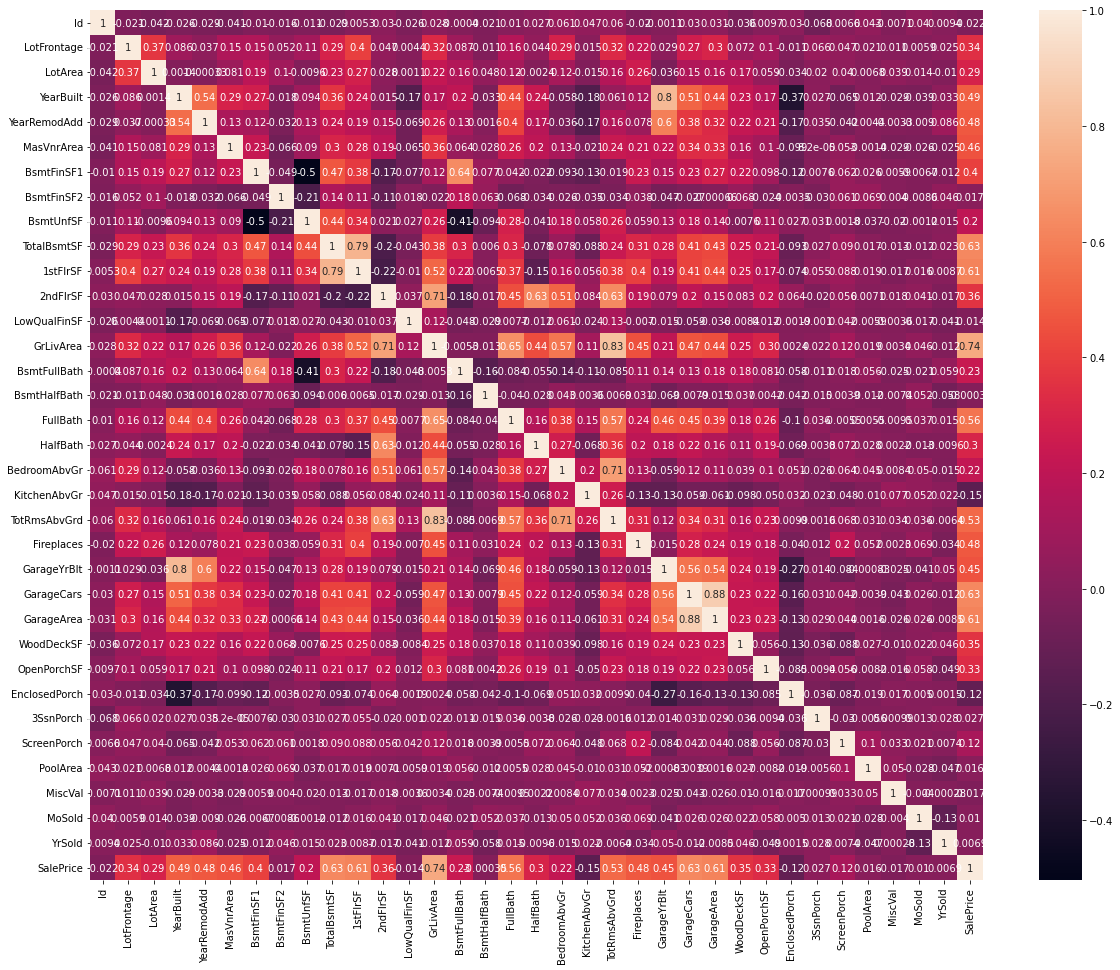

In [103]:
# Plotting a heatmap for the numerical variables to check the correlation
plt.figure(figsize=(20,16))
sns.heatmap(numeric.corr(),annot=True)
plt.show()

In [104]:
# Plotting a pairplot to see the relation between various predictors and target
#plt.figure(figsize=(20,18))
#sns.pairplot(numeric)
#plt.show()

In [105]:
# print the null values percentage in the data
null = data1.isnull().mean() * 100  
null = null[null>0].sort_values(ascending = False)
print(null)

PoolQC          99.749583
MiscFeature     95.826377
Alley           94.073456
Fence           79.883139
FireplaceQu     46.994992
LotFrontage     19.782972
GarageType       5.091820
GarageYrBlt      5.091820
GarageFinish     5.091820
GarageQual       5.091820
GarageCond       5.091820
BsmtExposure     2.754591
BsmtFinType2     2.754591
BsmtFinType1     2.671119
BsmtCond         2.671119
BsmtQual         2.671119
MasVnrArea       0.333890
MasVnrType       0.333890
Electrical       0.083472
dtype: float64


### Upon inspecting the data dictionary, we saw that many vriables have a meaningful None value, thus we are replacing the Nan values for those with "Not Present"

# 3. Preparing the data for modeling

In [106]:
# Replacing the NaN values with "Not present"

na_impute = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual',
             'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']
for i in na_impute:
    data1[i].fillna("Not present",inplace=True)

In [107]:
# 'Electrical' variable had a NaN value which can be replaced by SBrkr after looking 
data1['Electrical'].fillna('SBrkr',inplace=True)

In [108]:
# Numerical Variables with NaN values are replaced by using the mean() of the variables
for i in ['LotFrontage','GarageYrBlt','MasVnrArea']:
    data1[i].fillna(data1[i].mean(),inplace=True)

In [109]:
# Looking at the null values in the data frame
null = data1.isnull().mean() * 100  
null = null[null>0].sort_values(ascending = False)
print(null)

# There are no null values in the dataset now

Series([], dtype: float64)


In [110]:
# Separating the categorical variables into a separate dataframe
categorical_vars = data1.select_dtypes(include=['object'])
categorical_vars.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [111]:
# One hot encoding the categorical variables

data1['LotShape'] = data1['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
data1['Utilities'] = data1['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
data1['LandSlope'] = data1['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
data1['HouseStyle'] = data1['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
data1['ExterQual'] = data1['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data1['ExterCond'] = data1['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data1['BsmtQual'] = data1['BsmtQual'].map({'Nd':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data1['BsmtCond'] = data1['BsmtCond'].map({'Nd':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data1['BsmtExposure'] = data1['BsmtExposure'].map({'Nd':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data1['BsmtFinType1'] = data1['BsmtFinType1'].map({'Nd':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data1['BsmtFinType2'] = data1['BsmtFinType2'].map({'Nd':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data1['HeatingQC'] = data1['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data1['CentralAir'] = data1['CentralAir'].map({'N':0,'Y':1})
data1['KitchenQual'] = data1['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data1['GarageFinish'] = data1['GarageFinish'].map({'Nd':0,'Unf':1,'RFn':2,'Fin':3})
data1['GarageQual'] = data1['GarageQual'].map({'Nd':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data1['GarageCond'] = data1['GarageCond'].map({'Nd':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data1['Functional'] = data1['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
data1['FireplaceQu'] = data1['FireplaceQu'].map({'Nd':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})


In [112]:
# Using Pandas to create dummy variables for all of the categorical features and looking at the shape of the dummy_vars
dummy_vars = pd.get_dummies(categorical_vars,drop_first=True)
dummy_vars.shape

(1198, 240)

In [113]:
# There are a lot of dummy variables that have highly class imbalanced data 
# It is better to drop dummies where >95% of data is of a single class

dummies_to_drop = [feat for feat in dummy_vars.columns if dummy_vars[feat].value_counts()[0]/dummy_vars.shape[0] >= 0.95]
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmC

In [114]:
# dropping the dummies_to_drop from the dummy_vars
dummy_vars = dummy_vars.drop(dummies_to_drop,axis=1)

In [115]:
# Dropping all the categorical variables and 'Id' feature
data1.drop(categorical_vars,inplace=True,axis=1)
data1.drop('Id',axis=1,inplace=True)

In [116]:
# Concatenating the housing and dummy_vars dataframe
data1= pd.concat([data1,dummy_vars],axis=1)

In [117]:
# Shape of the dataframe after adding dummy_variables
data1.shape

(1198, 119)

In [118]:
# Since the 'SalePrice' is right skewed, we have to apply a log transformation to the data

y = np.log(data1.pop('SalePrice'))
X = data1

In [119]:
# Train test data split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [120]:
# Analyzing the shapes of test and train datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(838, 118)
(360, 118)
(838,)
(360,)


In [121]:
# Instantiating StandardScaler and fitting it on X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [122]:
# Creating new Dataframes to store the scaler_transformed X_train and X_test 

X_train_scaled = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_test_scaled  = pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns)

In [123]:
## Since we have above 100 predictors, we cannot manually select the besst ones, let's use the automated selection approach
# RFE is used here to select the best subset of predictors among all

# Instantiating LinearRegression object and fitting it on X_train_scaled and y_train
lm = LinearRegression()
lm.fit(X_train_scaled,y_train)
# Instantiating RFE object and filtering out the top predictors
rfe = RFE(lm,50)
rfe.fit(X_train_scaled,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [124]:
#CHecking the columns selected by RFE
rfe_scores = pd.DataFrame(list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [125]:
rfe_scores

,Column_Names,Status,Rank
0,LotFrontage,False,32
1,LotArea,True,1
2,YearBuilt,True,1
3,YearRemodAdd,True,1
4,MasVnrArea,False,39
5,BsmtFinSF1,True,1
6,BsmtUnfSF,False,10
7,TotalBsmtSF,True,1
8,1stFlrSF,True,1
9,2ndFlrSF,True,1


In [126]:
# Separating the variables that are filtered by rfe into rfe_cols
rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
rfe_cols = [cols[0] for cols in rfe_ranking if cols[1]==True]
len(rfe_cols)

50

In [127]:
# Updating the X_train and X_test dataset to have only rfe_cols 

X_train_scaled = X_train_scaled[rfe_cols]
X_test_scaled = X_test_scaled[rfe_cols]

In [128]:
# Shape of the X_train with only rfe_cols
X_train_scaled.shape

(838, 50)

In [129]:
#Fitting a LR Model with the selected features
lm0  = LinearRegression()
lm0.fit(X_train_scaled,y_train)

LinearRegression()

In [130]:
#Checking the train and test error
y_train_pred = lm0.predict(X_train_scaled)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm0.predict(X_test_scaled)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9193523569751066
0.9071385847336967


### There are about 50 variables in this Linear regression model, we cannot possibly analyze all the predictors one by one basis on the p values and the VIF's like we did in the simple Linear regression. This problem requires regularization.

In [131]:
#A function which can generate both ridge and lasso

# Building a function that returns the final_model and the y_test_pred
def build_model(X_train, y_train, X_test, params, model='ridge'):
    if model == 'ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
    model_cv.fit(X_train, y_train)
    alpha = model_cv.best_params_["alpha"]
    print("Optimum alpha for %s is %f" %(model, alpha))
    final_model = model_cv.best_estimator_

    final_model.fit(X_train, y_train)
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
    print(model," Regression with ",alpha)
    print("===================================")
    print('R2 score (train) : ',r2_score(y_train,y_train_pred))
    print('R2 score (test) : ',r2_score(y_test,y_test_pred))
    print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

    return final_model, y_test_pred

In [132]:
# setting the parameters for alpha to find the best value of hyperparameter in Ridge Regrerssion
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_scaled, y_train, X_test_scaled, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9188078654326102
R2 score (test) :  0.908435187191818
RMSE (train) :  0.10455788284572597
RMSE (test) :  0.11081062768571424


In [133]:
# setting the parameters for alpha to find the best value of hyperparameter in Lasso Regression
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_scaled, y_train, X_test_scaled, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.000100
lasso  Regression with  0.0001
R2 score (train) :  0.9193321803056747
R2 score (test) :  0.9073517504101664
RMSE (train) :  0.10421973405110517
RMSE (test) :  0.11146428082788683


In [134]:
# Creating a dataframe that consists of the predictors and their coefficients in both Ridge and Lasso Regression
model_coefficients = pd.DataFrame(index=X_test_scaled.columns)
model_coefficients.rows = X_test_scaled.columns

model_coefficients['Ridge (alpha=20.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=20.0),Lasso (alpha=0.0001)
LotArea,0.044045,0.044966
YearBuilt,0.037311,0.041969
YearRemodAdd,0.036372,0.036136
BsmtFinSF1,0.024550,0.023540
TotalBsmtSF,0.047785,0.048832
1stFlrSF,0.038882,0.044681
2ndFlrSF,0.065665,0.082402
GrLivArea,0.070081,0.060895
BsmtFullBath,0.014339,0.015467
Fireplaces,0.033199,0.032880


In [135]:
# Converting the predictions to their original scale (anti log)
test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:10])

[113022 205599 158660 220819 132980 323083 199159 126871 318332 151998]


In [136]:
#Looking at the top model coefficients of Ridge model.
model_coefficients[['Ridge (alpha=20.0)']].sort_values(by='Ridge (alpha=20.0)', ascending=False)

,Ridge (alpha=20.0)
GrLivArea,0.070081
2ndFlrSF,0.065665
TotalBsmtSF,0.047785
LotArea,0.044045
OverallCond_7,0.042629
1stFlrSF,0.038882
YearBuilt,0.037311
YearRemodAdd,0.036372
Fireplaces,0.033199
CentralAir_Y,0.029106


In [137]:
#Printing the top 10 model coefficients of Ridge regression
model_coefficients[['Ridge (alpha=20.0)']].sort_values(by='Ridge (alpha=20.0)', ascending=False).index[:10]

Index(['GrLivArea', '2ndFlrSF', 'TotalBsmtSF', 'LotArea', 'OverallCond_7',
       '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'CentralAir_Y'],
      dtype='object')

# Interpretation of Results:

### The management can make use of this model on the future test datasets to get the predicted sales values of different houses from this model. (Ridge Regression model). It's is performing really well on test as well as train datasets.

#### If they want to interpret the results of this model and get to know bout the most important drivers, its as follows:
    
#### The most important top 10 variables which determine the pricing of a house are:
   1. GrLivArea: Above grade (ground) living area square feet
   2. 2ndFlrSF: Second floor square feet
   3. TotalBsmtSF: Total square feet of basement area
   4. LotArea: Lot size in square feet
   5. OverallCond_7: Good Overall Condition
   6. 1stFlrSF: First Floor square feet
   7. YearBuilt: Original construction date
   8. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
   9. Fireplaces: Number of fireplaces
   10. Central air conditioning= Yes


## Computations for answers of Subjective questions

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [138]:
# Ridge Model Building
ridge_model = Ridge(alpha=40.0)
ridge_model.fit(X_train_scaled, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

print("Model Evaluation : Ridge Regression, alpha=40.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=40.0
R2 score (train) :  0.9179
R2 score (test) :  0.9089
RMSE (train) :  0.1052
RMSE (test) :  0.1105


In [139]:
# Lasso Model building
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_scaled, y_train)
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9193
R2 score (test) :  0.9075
RMSE (train) :  0.1043
RMSE (test) :  0.1114


In [140]:
#Adding the new coefficients to the model_coefficients dataframe
model_coefficients['Ridge (alpha = 40.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.0002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=20.0),Lasso (alpha=0.0001),Ridge (alpha = 40.0),Lasso (alpha = 0.0002)
LotArea,0.044045,0.044966,0.043028,0.044858
YearBuilt,0.037311,0.041969,0.033487,0.041816
YearRemodAdd,0.036372,0.036136,0.036293,0.036249
BsmtFinSF1,0.024550,0.023540,0.025164,0.023767
TotalBsmtSF,0.047785,0.048832,0.046994,0.048726
1stFlrSF,0.038882,0.044681,0.039392,0.043108
2ndFlrSF,0.065665,0.082402,0.058680,0.079526
GrLivArea,0.070081,0.060895,0.070227,0.063436
BsmtFullBath,0.014339,0.015467,0.013466,0.015166
Fireplaces,0.033199,0.032880,0.033244,0.032892


In [141]:
# Looking at the top 3 variables in the Lasso model
model_coefficients.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(3)

,Ridge (alpha=20.0),Lasso (alpha=0.0001),Ridge (alpha = 40.0),Lasso (alpha = 0.0002)
2ndFlrSF,0.065665,0.082402,0.058680,0.079526
GrLivArea,0.070081,0.060895,0.070227,0.063436
TotalBsmtSF,0.047785,0.048832,0.046994,0.048726


In [142]:
# Looking at the top 3 variables in the Ridge model
model_coefficients.sort_values(by='Ridge (alpha = 40.0)', ascending=False).head(3)

,Ridge (alpha=20.0),Lasso (alpha=0.0001),Ridge (alpha = 40.0),Lasso (alpha = 0.0002)
GrLivArea,0.070081,0.060895,0.070227,0.063436
2ndFlrSF,0.065665,0.082402,0.058680,0.079526
TotalBsmtSF,0.047785,0.048832,0.046994,0.048726


3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [143]:
# Top 5 featues in Lasso final model
model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)

,Ridge (alpha=20.0),Lasso (alpha=0.0001),Ridge (alpha = 40.0),Lasso (alpha = 0.0002)
2ndFlrSF,0.065665,0.082402,0.058680,0.079526
GrLivArea,0.070081,0.060895,0.070227,0.063436
TotalBsmtSF,0.047785,0.048832,0.046994,0.048726
OverallCond_7,0.042629,0.048306,0.038398,0.047309
LotArea,0.044045,0.044966,0.043028,0.044858


In [144]:
# Removing the top 5 predcitors from the X_train and X_test dataset
X_train_new = X_train_scaled.drop(['GrLivArea', '2ndFlrSF', 'TotalBsmtSF', 'OverallCond_7', '1stFlrSF'], axis=1)
X_test_new = X_test_scaled.drop(['GrLivArea', '2ndFlrSF', 'TotalBsmtSF', 'OverallCond_7', '1stFlrSF'], axis=1)

In [145]:
# Building a new lasso model after removing top 5 predictors
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [146]:
# Looking at the model coefficients
lasso_model.coef_

array([ 8.14825182e-02,  3.09796767e-03,  4.49850421e-02,  4.71055855e-02,
        2.86717895e-05,  5.69129829e-02,  3.78696651e-02,  4.45300644e-02,
        2.50416637e-02, -1.79388507e-02, -1.75048563e-02,  2.62671685e-02,
       -7.99807954e-03,  6.73925549e-03, -3.23027680e-02,  2.53836050e-02,
       -6.01436881e-02, -5.15346796e-02, -2.94441537e-02,  2.86681667e-02,
       -1.57953453e-02, -6.91038706e-03,  8.93757793e-04,  1.48393839e-03,
       -2.59833702e-02, -6.51192069e-03,  2.89839406e-02, -1.21522014e-02,
       -3.52956336e-02,  5.46146034e-02,  5.53434305e-02,  2.70336675e-02,
       -3.70248393e-03, -7.83637924e-03,  2.23525469e-02,  2.11303036e-02,
        3.12589820e-02, -4.35775472e-02, -5.69511359e-02,  1.07481989e-02,
       -7.77592896e-03,  1.46759449e-02, -1.47340541e-02,  1.46990775e-02,
        2.21205406e-02])

In [147]:
# Printing the top 5 model coefficients in the new Lasso model
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)


,Lasso
LotArea,0.081483
Fireplaces,0.056913
ExterCond_TA,0.055343
ExterCond_Gd,0.054615
BsmtFinSF1,0.047106
